In [15]:
from datasets import load_dataset,DatasetDict
from sklearn.model_selection import train_test_split
import matplotlib as plt
import io
import os
from PIL import Image

In [16]:
ds = load_dataset("Karthik11232/human_face_generation")
#split the dataset 
train_test_set = ds['train'].train_test_split(test_size=0.2)
train_val_set = train_test_set['train'].train_test_split(test_size=0.2)

ds = DatasetDict({
    'train': train_test_set['train'],
    'test': train_test_set['test'],
    'validation': train_val_set['test']
})
print (ds)
print(ds.shape)
print(train_test_set.shape)
print(train_val_set.shape)

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 2132
    })
    test: Dataset({
        features: ['image'],
        num_rows: 533
    })
    validation: Dataset({
        features: ['image'],
        num_rows: 427
    })
})
{'train': (2132, 1), 'test': (533, 1), 'validation': (427, 1)}
{'train': (2132, 1), 'test': (533, 1)}
{'train': (1705, 1), 'test': (427, 1)}


In [17]:
# Save the datasets to disk
output_dir = './human_face_generation_split/raw'
os.makedirs(output_dir, exist_ok=True)

# Function to save images
def save_images(dataset, split_name):
    split_dir = os.path.join(output_dir, split_name)
    os.makedirs(split_dir, exist_ok=True)
    
    for idx, sample in enumerate(dataset):
        image=sample["image"]
        image_path = os.path.join(split_dir, f'image_{idx}.png')
        image.save(image_path,"jpeg")

# Save each split
save_images(ds['train'], 'train')
save_images(ds['validation'], 'validation')
save_images(ds['test'], 'test')

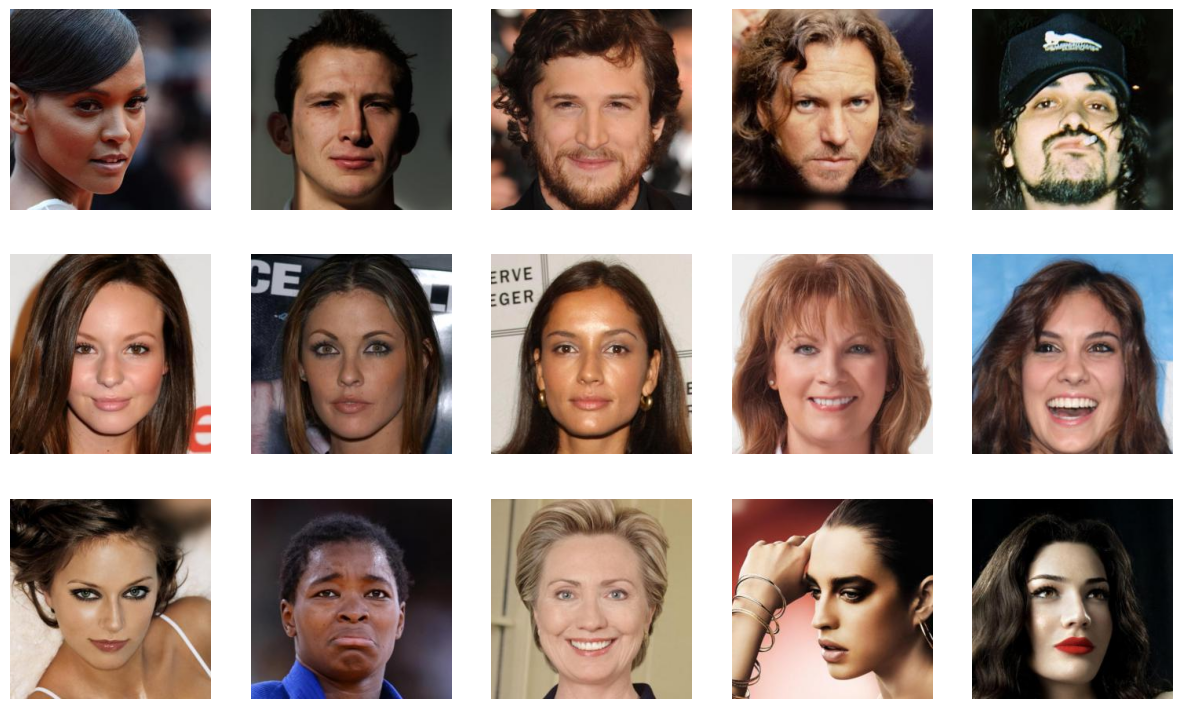

In [18]:
import random
import matplotlib.pyplot as plt

# Function to plot random images in a grid
def plot_random_images(dataset, num_images=15, rows=3, cols=5):
    # Get random indices
    random_indices = random.sample(range(len(dataset)), num_images)
    
    # Plot the images
    plt.figure(figsize=(15, 9))
    for i, idx in enumerate(random_indices):
        image = dataset[idx]['image']
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Plot 15 random images in 3 rows and 5 columns
plot_random_images(ds['train'], num_images=15, rows=3, cols=5)
